In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('logistic-regression-code')
jovian.set_colab_id('1pwAs-9hpA-UdSXcz5P5Qg6Si1lrI2M-a')

# logistic-regression-code

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="logistic-regression-code")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/noumanamir453/logistic-regression-code


'https://jovian.ai/noumanamir453/logistic-regression-code'

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
#Downloading dataset
train_dataset = MNIST(root='data/', download=True)
test_dataset = MNIST(root='data/', train=False)

In [ ]:
#Transform the MNIST data into tensors as Pytorch cannot process images
import torchvision.transforms as transforms

train_dataset = MNIST(root='data/', train = True, transform=transforms.ToTensor())

In [ ]:
#splitting of data into training an validation sets
from torch.utils.data import random_split

train_ds, val_ds = random_split(train_dataset, [50000,10000])

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
input_size = 28*28
num_classes = 10

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self.forward(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self.forward(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
      return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

  

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    #Training
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Validation
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.7378362417221069, 'val_loss': 1.5731614828109741}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3989, val_acc: 0.7658
Epoch [1], val_loss: 1.2659, val_acc: 0.7836
Epoch [2], val_loss: 1.1622, val_acc: 0.7999
Epoch [3], val_loss: 1.0798, val_acc: 0.8112
Epoch [4], val_loss: 1.0129, val_acc: 0.8179


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.9578, val_acc: 0.8238
Epoch [1], val_loss: 0.9115, val_acc: 0.8284
Epoch [2], val_loss: 0.8721, val_acc: 0.8343
Epoch [3], val_loss: 0.8381, val_acc: 0.8383
Epoch [4], val_loss: 0.8086, val_acc: 0.8422


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7826, val_acc: 0.8463
Epoch [1], val_loss: 0.7596, val_acc: 0.8499
Epoch [2], val_loss: 0.7390, val_acc: 0.8513
Epoch [3], val_loss: 0.7204, val_acc: 0.8532
Epoch [4], val_loss: 0.7037, val_acc: 0.8546


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6884, val_acc: 0.8559
Epoch [1], val_loss: 0.6745, val_acc: 0.8581
Epoch [2], val_loss: 0.6617, val_acc: 0.8603
Epoch [3], val_loss: 0.6499, val_acc: 0.8620
Epoch [4], val_loss: 0.6390, val_acc: 0.8633


In [ ]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6288, val_acc: 0.8636
Epoch [1], val_loss: 0.6194, val_acc: 0.8646
Epoch [2], val_loss: 0.6106, val_acc: 0.8655
Epoch [3], val_loss: 0.6023, val_acc: 0.8670
Epoch [4], val_loss: 0.5946, val_acc: 0.8684


In [ ]:
history6 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5873, val_acc: 0.8691
Epoch [1], val_loss: 0.5803, val_acc: 0.8704
Epoch [2], val_loss: 0.5738, val_acc: 0.8715
Epoch [3], val_loss: 0.5677, val_acc: 0.8722
Epoch [4], val_loss: 0.5618, val_acc: 0.8730


In [ ]:
history7 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5563, val_acc: 0.8741
Epoch [1], val_loss: 0.5510, val_acc: 0.8742
Epoch [2], val_loss: 0.5460, val_acc: 0.8748
Epoch [3], val_loss: 0.5412, val_acc: 0.8754
Epoch [4], val_loss: 0.5366, val_acc: 0.8757


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Accuracy vs. No of epochs')

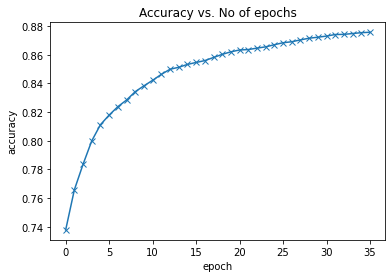

In [ ]:
t_history = [result0] + history1 + history2 + history3 + history4 + history5 + history6 + history7
accuracies = [result['val_acc'] for result in t_history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No of epochs')

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="logistic-regression-code")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/noumanamir453/logistic-regression-code


'https://jovian.ai/noumanamir453/logistic-regression-code'

In [ ]:
import torchvision.transforms as transforms

test_dataset = MNIST(root='data/', train = False, transform=transforms.ToTensor())

In [ ]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

In [ ]:
img, label = test_dataset[0]
print("Label:", label, ', Predicted: ', predict_image(img, model))

Label: 7 , Predicted:  7


In [ ]:
img, label = test_dataset[10]
print("Label:", label, ', Predicted: ', predict_image(img, model))

Label: 0 , Predicted:  0


In [ ]:
img, label = test_dataset[193]
print("Label:", label, ', Predicted: ', predict_image(img, model))

Label: 9 , Predicted:  4


In [ ]:
img, label = test_dataset[1839]
print("Label:", label, ', Predicted: ', predict_image(img, model))

Label: 2 , Predicted:  8


In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.875195324420929, 'val_loss': 0.511316180229187}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.6015e-02, -3.3854e-02,  2.7149e-02,  ..., -1.9504e-02,
                       -2.4578e-02, -2.3207e-03],
                      [ 1.1724e-02,  1.9901e-02,  2.7741e-02,  ...,  3.4543e-03,
                       -2.5316e-03, -1.1730e-02],
                      [-3.2111e-02,  1.9816e-02,  7.6093e-03,  ...,  4.3608e-03,
                       -1.5969e-02,  1.9107e-02],
                      ...,
                      [-2.9370e-02,  1.0816e-02,  3.6944e-04,  ..., -3.9445e-03,
                       -2.4568e-02, -4.0554e-03],
                      [ 1.3130e-02, -1.6421e-02, -1.7066e-02,  ...,  8.9169e-05,
                        8.3852e-03, -2.2429e-02],
                      [ 1.3987e-02,  3.2672e-02,  3.3547e-02,  ..., -2.7117e-02,
                        2.1515e-02, -4.8434e-03]])),
             ('linear.bias',
              tensor([-0.0847,  0.1385, -0.0260, -0.0220,  0.0676,  0.0738,  0.0172,  0.0512,
                      -0.1552,

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.875195324420929, 'val_loss': 0.511316180229187}